In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('https://github.com/campusx-official/100-days-of-machine-learning/raw/main/kmeans/student_clustering.csv')

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [4]:
df.shape

(200, 2)

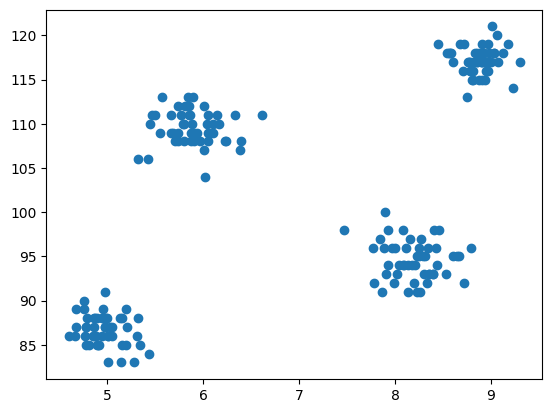

In [7]:
plt.scatter(x= df['cgpa'], y= df['iq'])

**Check using Elbow method**

In [8]:
from sklearn.cluster import KMeans

In [11]:
wcss= []

for i in range(1,11):
  km= KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)


In [12]:
wcss

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 514.1616803171116,
 395.9605877691831,
 295.43918959431915,
 233.54082485509014,
 211.38968554149295,
 182.33090074229688]

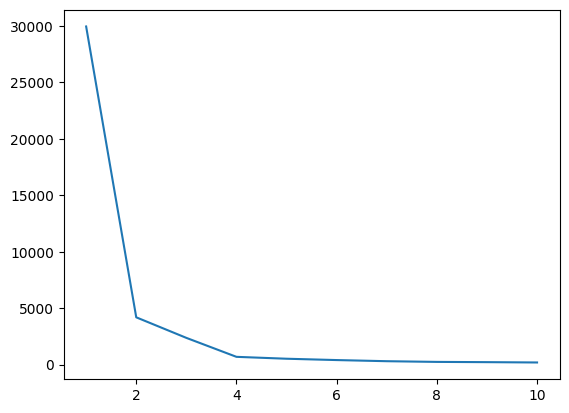

In [16]:
plt.plot(range(1,11),wcss)
plt.show()

4 is the Elbow point

In [17]:
X= df.iloc[:,:].values
km= KMeans(n_clusters=4)
y_means= km.fit_predict(X)

In [18]:
y_means

array([1, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 0, 3, 1,
       3, 1, 1, 3, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 2, 0, 1, 0, 1, 3, 3, 1,
       2, 2, 3, 0, 2, 0, 1, 1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 3, 3, 2, 1, 2,
       3, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 2, 1, 3, 3, 2, 0, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 2, 2,
       3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 3, 1, 3, 0, 1, 3, 3, 0,
       1, 1, 0, 2, 0, 1, 3, 3, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 3, 0, 2, 0, 3, 1, 2, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 3,
       2, 0, 1, 2, 2, 0, 0, 0, 3, 1, 3, 3, 2, 0, 3, 3, 1, 1, 3, 1, 2, 0,
       0, 2], dtype=int32)

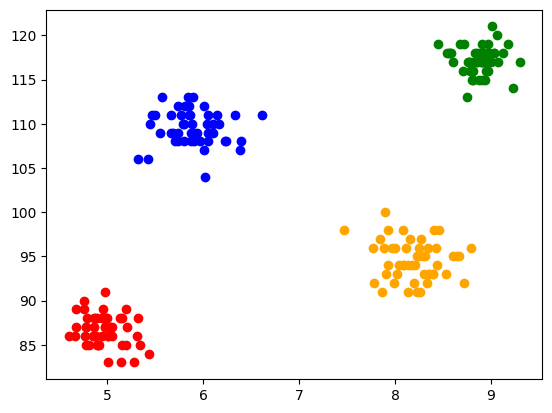

In [20]:
plt.scatter(X[y_means ==0,0], X[y_means==0,1], color='blue')
plt.scatter(X[y_means ==1,0], X[y_means==1,1], color='red')
plt.scatter(X[y_means ==2,0], X[y_means==2,1], color='green')
plt.scatter(X[y_means ==3,0], X[y_means==3,1], color='orange')

**K-Means on 3-D Data**

In [28]:
from sklearn.datasets import make_blobs
centroids= [(-5,-5,5),(5,5,-5),(3.5,-2.5,4), (-2.5,2.5,-4)]
cluster_std= [1,1,1,1]
X,y= make_blobs(n_samples=200, cluster_std= cluster_std, centers=centroids,n_features=3, random_state=1 )

In [29]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [31]:
import plotly.express as px
fig= px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [33]:
wcss= []

for i in range(1,21):
  km= KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

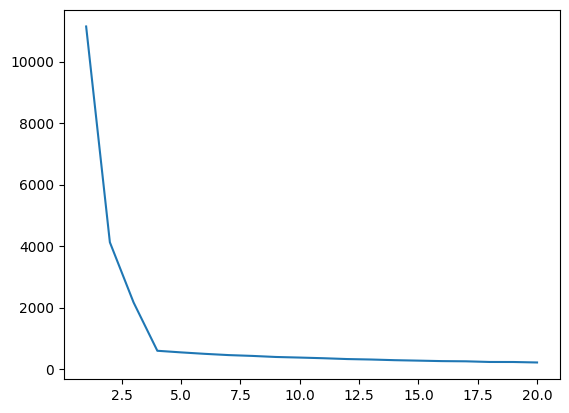

In [34]:
plt.plot(range(1,21),wcss)
plt.show()

In [35]:
km= KMeans(n_clusters=4)
y_pred=km.fit_predict(X)

In [37]:
df= pd.DataFrame()

df['col1']= X[:,0]
df['col2']= X[:,1]
df['col3']= X[:,2]
df['label']= y_pred

In [39]:
fig= px.scatter_3d(df, x='col1', y='col2', z='col3', color='label')
fig.show()